# Life Expectancy Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import types
import pandas as pd

body="/content/Life Expectancy Data_ WHO.csv"

LifeExpectancyData = pd.read_csv(body)
LifeExpectancyData.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

each column in the DataFrame with their corresponding explanations:

'Year': The year in which the data was recorded.

'Adult Mortality': The number of adult deaths per 1,000 population.

'Infant deaths': The number of infant deaths (under 1 year of age) per 1,000 live births.

'Alcohol': The average amount of alcohol consumption, measured in liters of pure alcohol.

'Percentage expenditure': Expenditure on health as a percentage of the GDP per capita.

'Hepatitis B': Percentage of one-year-old children immunized against Hepatitis B.

'Measles': Number of reported measles cases per 1,000 population.

'BMI': Body Mass Index, a measure of body fat based on height and weight.

'Under-five deaths': The number of deaths of children under five years of age per 1,000 live births.

'Polio': Percentage of one-year-old children immunized against Polio.

'Total expenditure': Total government expenditure on health as a percentage of the GDP.

'Diphtheria': Percentage of one-year-old children immunized against Diphtheria.

'HIV/AIDS': Deaths per 1,000 live births caused by HIV/AIDS.

'GDP': Gross Domestic Product per capita.

'Population': Total population of the country.

'Thinness 1-19 years': The prevalence of thinness among children and adolescents aged 10-19.

'Thinness 5-9 years': The prevalence of thinness among children aged 5-9.

'Income composition of resources': The Human Development Index (HDI) income composition score.

'Schooling': Average number of years of schooling for adults.

'Life expectancy': The average number of years a newborn is expected to live, also the target variable.

'Status': The development status of the country (e.g., 'Developed' or 'Developing').

In [6]:
# Standardize column names in LifeExpectancyData
LifeExpectancyData.columns = LifeExpectancyData.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the standardized column names
print(LifeExpectancyData.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [7]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [8]:
LifeExpectancyData.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [9]:
LifeExpectancyData.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [10]:
LifeExpectancyData.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           alcohol  percentage_expenditure  hepatitis_b        measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               bmi  under-five_deaths        polio  total_expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        diphtheria     hiv/aids            gdp    population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness__1-19_years  thinness_5-9_years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       income_composition_of_resources    schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

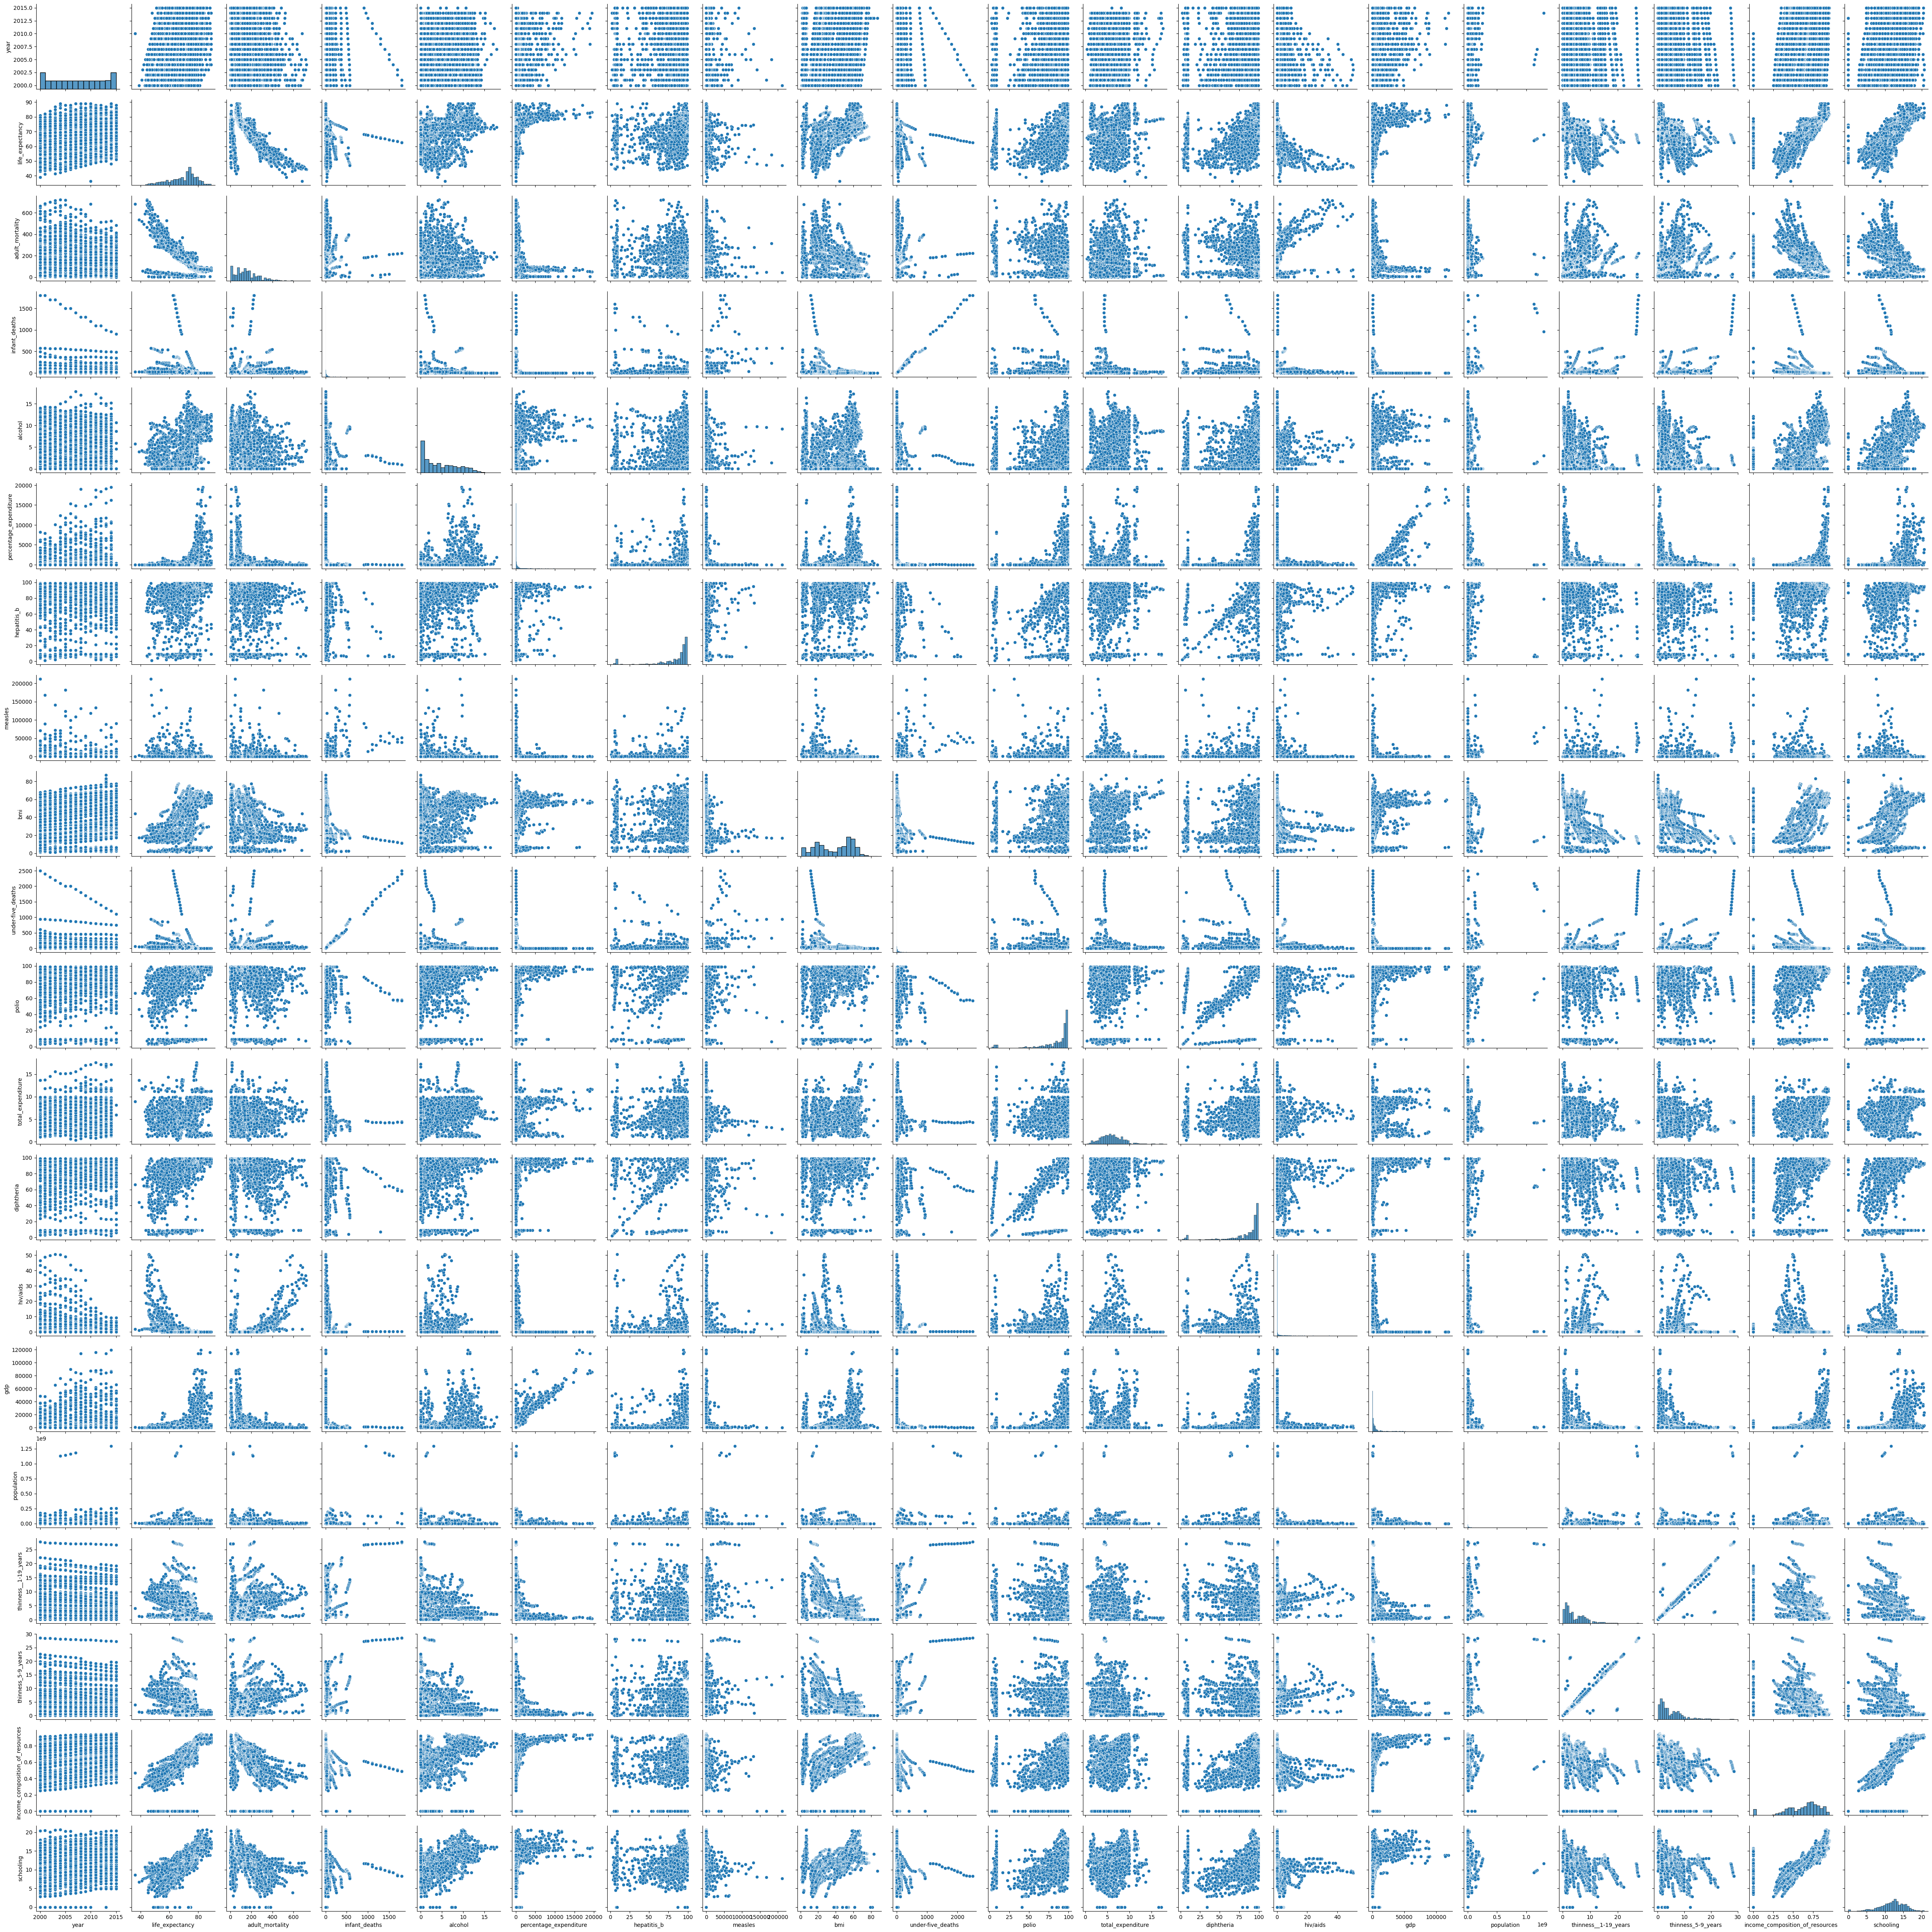

In [11]:
sns.pairplot(LifeExpectancyData)

<ipython-input-12-7acd4334f179>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(LifeExpectancyData.corr())


<Axes: >

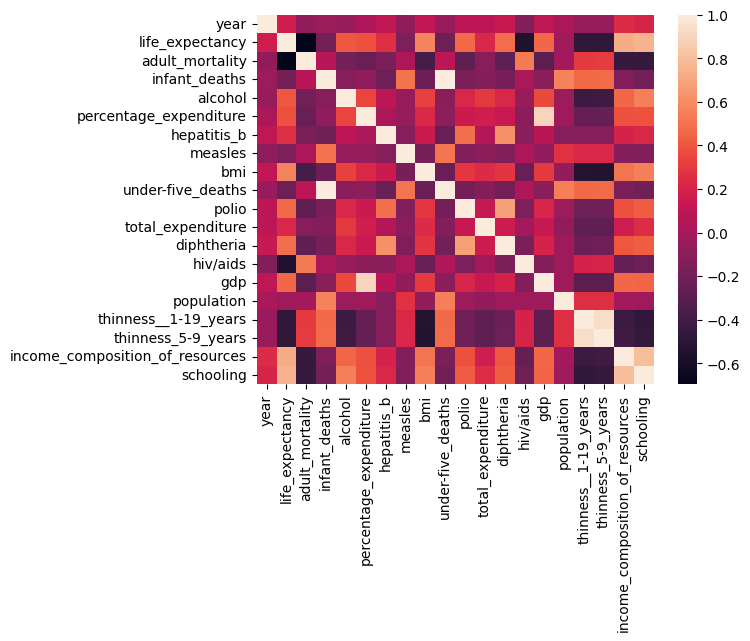

In [12]:
sns.heatmap(LifeExpectancyData.corr())

# Preprocessing the data

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_columns = ['year',   'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling','life_expectancy']
categorical_column = ['status']

onehot_categorical = OneHotEncoder(handle_unknown='ignore')
impute_columns = SimpleImputer(strategy='mean')

numerical_transformer = Pipeline(steps=[('impute',impute_columns)])
string_transformer = Pipeline(steps=[('onehot',onehot_categorical)])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_columns),('str', string_transformer, categorical_column)])

In [14]:
# Check the column names in the dataset
print(LifeExpectancyData.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [15]:
df = pd.DataFrame(preprocessor.fit_transform(LifeExpectancyData))
df.head()

0      1     2     3          4     5       6     7     8     9   ...  \
0  2015.0  263.0  62.0  0.01  71.279624  65.0  1154.0  19.1  83.0   6.0  ...   
1  2014.0  271.0  64.0  0.01  73.523582  62.0   492.0  18.6  86.0  58.0  ...   
2  2013.0  268.0  66.0  0.01  73.219243  64.0   430.0  18.1  89.0  62.0  ...   
3  2012.0  272.0  69.0  0.01  78.184215  67.0  2787.0  17.6  93.0  67.0  ...   
4  2011.0  275.0  71.0  0.01   7.097109  68.0  3013.0  17.2  97.0  68.0  ...   

    12          13          14    15    16     17    18    19   20   21  
0  0.1  584.259210  33736494.0  17.2  17.3  0.479  10.1  65.0  0.0  1.0  
1  0.1  612.696514    327582.0  17.5  17.5  0.476  10.0  59.9  0.0  1.0  
2  0.1  631.744976  31731688.0  17.7  17.7  0.470   9.9  59.9  0.0  1.0  
3  0.1  669.959000   3696958.0  17.9  18.0  0.463   9.8  59.5  0.0  1.0  
4  0.1   63.537231   2978599.0  18.2  18.2  0.454   9.5  59.2  0.0  1.0  

[5 rows x 22 columns]

In [16]:
df.drop([21],axis=1,inplace=True)

df.columns = ['year',  'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'life_expectancy', 'status']
df.head()

year  adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
0  2015.0            263.0           62.0     0.01               71.279624   
1  2014.0            271.0           64.0     0.01               73.523582   
2  2013.0            268.0           66.0     0.01               73.219243   
3  2012.0            272.0           69.0     0.01               78.184215   
4  2011.0            275.0           71.0     0.01                7.097109   

   hepatitis_b  measles   bmi  under-five_deaths  polio  ...  diphtheria  \
0         65.0   1154.0  19.1               83.0    6.0  ...        65.0   
1         62.0    492.0  18.6               86.0   58.0  ...        62.0   
2         64.0    430.0  18.1               89.0   62.0  ...        64.0   
3         67.0   2787.0  17.6               93.0   67.0  ...        67.0   
4         68.0   3013.0  17.2               97.0   68.0  ...        68.0   

   hiv/aids         gdp  population  thinness__1-19_years  thinness_5-9_years  \
0       0.1  584.259210  33736494.0                  17.2                17.3   
1       0.1  612.696514    327582.0                  17.5                17.5   
2       0.1  631.744976  31731688.0                  17.7                17.7   
3       0.1  669.959000   3696958.0                  17.9                18.0   
4       0.1   63.537231   2978599.0                  18.2                18.2   

   income_composition_of_resources  schooling  life_expectancy  status  
0                            0.479       10.1             65.0     0.0  
1                            0.476       10.0             59.9     0.0  
2                            0.470        9.9             59.9     0.0  
3                            0.463        9.8             59.5     0.0  
4                            0.454        9.5             59.2     0.0  

[5 rows x 21 columns]

<ipython-input-17-4258ab9b65a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['life_expectancy'])


<Axes: xlabel='life_expectancy', ylabel='Density'>

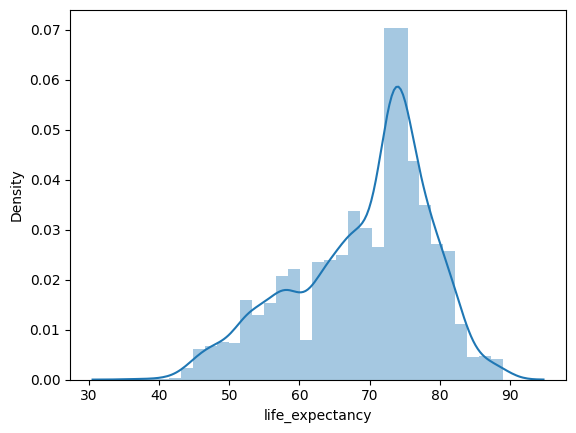

In [17]:
sns.distplot(df['life_expectancy'])

# Training a Random Forest Regressor Model

In [18]:
features = []
features = df.drop(['life_expectancy'],axis=1)
label = df['life_expectancy']

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2350, 20)
(2350,)
(588, 20)
(588,)


## Creating and Training the Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
model_name = 'Random Forest Regressor'

rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, random_state=0)

## Predictions from my Model

In [21]:
rfpredictions = rf.predict(x_test)

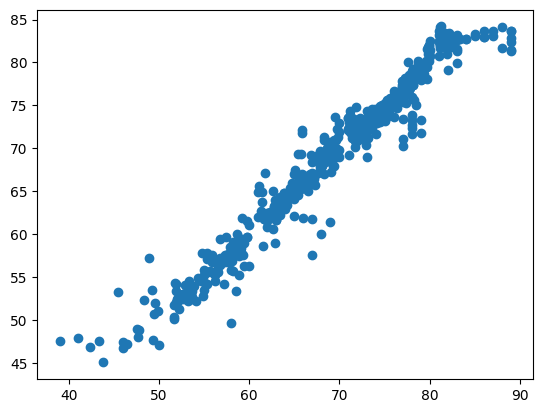

In [22]:
plt.scatter(y_test,rfpredictions)

<ipython-input-23-3e1a2a7bab87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-rfpredictions),bins=50)


<Axes: xlabel='life_expectancy', ylabel='Density'>

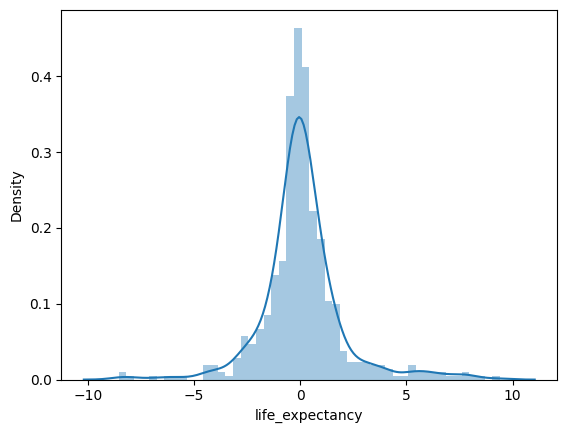

In [23]:
sns.distplot((y_test-rfpredictions),bins=50)

## Regression Evaluation Metrics

In [24]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rfpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rfpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpredictions)))
print('R^2: ',rf.score(x_test, y_test))

MAE: 1.2140467729389732
MSE: 3.8645442907039502
RMSE: 1.9658444217953643
R^2:  0.9575518110737933


In [25]:
# Assuming y_test and y_pred are the actual and predicted values, respectively
threshold = 3.0  # Adjust this threshold based on your problem

# Calculate the percentage of predictions within the threshold
accuracy_percentage = (sum(abs(y_test - rfpredictions) <= threshold) / len(y_test)) * 100

print(f'Accuracy within {threshold} years: {accuracy_percentage:.2f}%')


Accuracy within 3.0 years: 90.31%


## Checking for unwanted columns

<Axes: >

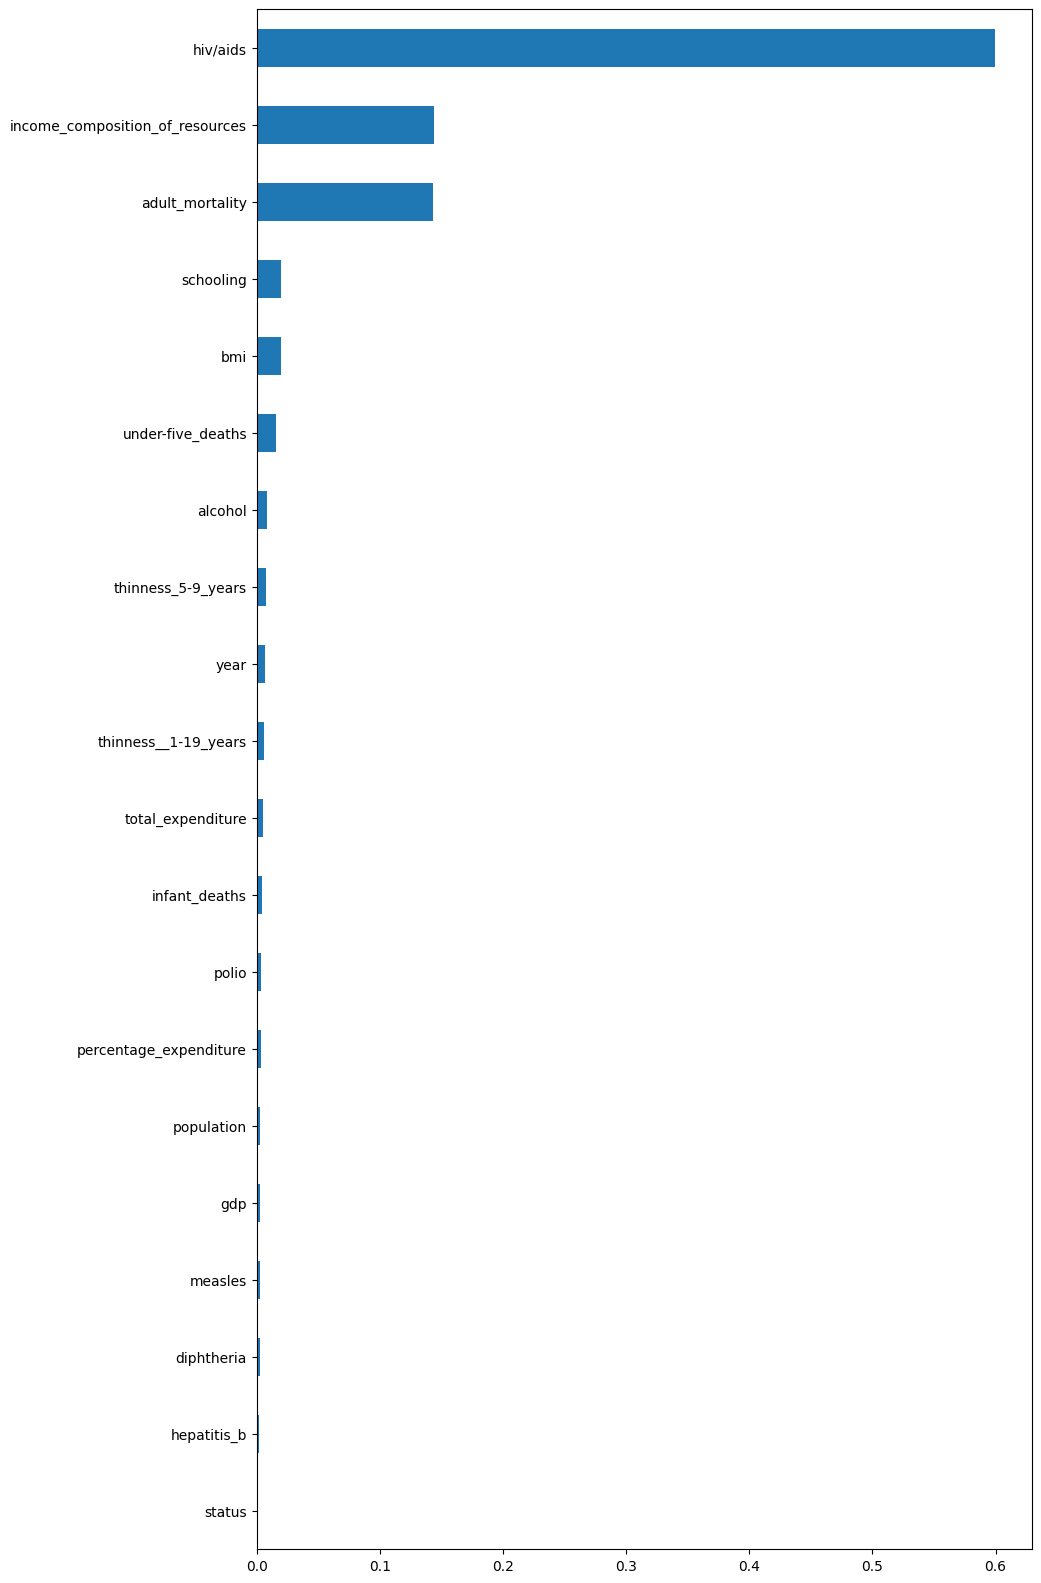

In [26]:
plt.figure(figsize=(10,20))
feat_importances = pd.Series(rf.feature_importances_, index = features.columns)
feat_importances.nsmallest(20).plot(kind='barh')

# Creating a better model

In [27]:
import pandas as pd

# Assuming you have a DataFrame df with a 'status' column
df = pd.DataFrame({'status': ['developing',  'developed']})

# Use get_dummies to one-hot encode the 'status' column
df_encoded = pd.get_dummies(df, columns=['status'], drop_first=True)

# Display the resulting DataFrame
print(df_encoded)


   status_developing
0                  1
1                  0


In [28]:
newFeatures = features[[
                        'year',
                        'status',
                        'population',
                        'hepatitis_b',
                        'measles',
                        'alcohol',
                        'bmi',
                        'polio',
                        'diphtheria',
                        'hiv/aids',
                        'gdp',
                        ]]


newLabel = label

In [29]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(newFeatures, newLabel, test_size=0.2, random_state=0)
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(2350, 11)
(2350,)
(588, 11)
(588,)


In [30]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

rf_model.fit(x_train1,y_train1)
rfpredictions1 = rf_model.predict(x_test1)
rfpredictions2 = rf_model.predict(x_train1)

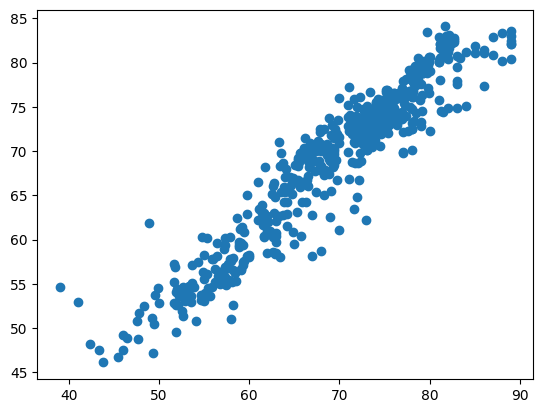

In [31]:
plt.scatter(y_test1,rfpredictions1)

<ipython-input-32-21918ef520dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test1-rfpredictions1),bins=50)


<Axes: xlabel='life_expectancy', ylabel='Density'>

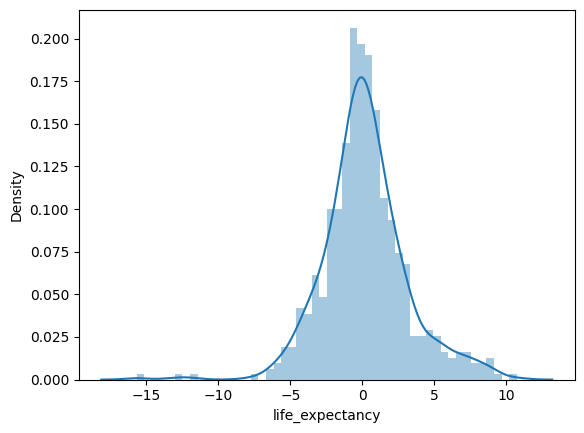

In [32]:
sns.distplot((y_test1-rfpredictions1),bins=50)

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test1, rfpredictions1))
print('MSE:', metrics.mean_squared_error(y_test1, rfpredictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, rfpredictions1)))
print('R^2: ',rf_model.score(x_test1, y_test1))

MAE: 2.095397676672301
MSE: 8.670051958640379
RMSE: 2.944495195893581
R^2:  0.9047680720271014


In [34]:
print('RMSE on train data: ', metrics.mean_squared_error(y_train1, rfpredictions2))
print('RMSE on test data: ',  metrics.mean_squared_error(y_test1, rfpredictions1))

RMSE on train data:  1.215446136575543
RMSE on test data:  8.670051958640379


In [39]:
import pandas as pd

# Create a new DataFrame with the specified column names
new_test_data = pd.DataFrame({

    'year': [2023],
    'status':[1], # zero means developed country
    'population':[20835722],
    'hepatitis_b':[87],
    'measles':[2500],
    'alcohol': [7.0],
    'bmi': [28.0],
    'polio':[90],
    'diphtheria':[88],
    'hiv/aids': [2.0],
    'gdp': [51386],

})

# Make predictions on the new test data using your trained model (rf_model)
predicted_life_expectancy = rf_model.predict(new_test_data)

# Print the predicted life expectancy
print("Predicted Life Expectancy: ", predicted_life_expectancy)


Predicted Life Expectancy:  [60.385]


In [36]:
import pickle
pickle_out = open("Life_Expectancy_Prediction.pkl","wb")
pickle.dump(rf_model,pickle_out)
pickle_out.close()